In [20]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Парная линейная регрессия

In [26]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv')

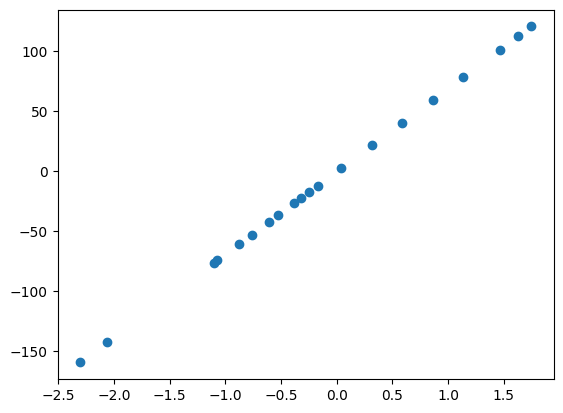

In [ ]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [ ]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(10000):
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

In [ ]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("error after gradient descent:", J)

error after gradient descent: 2.776975306057215e-06


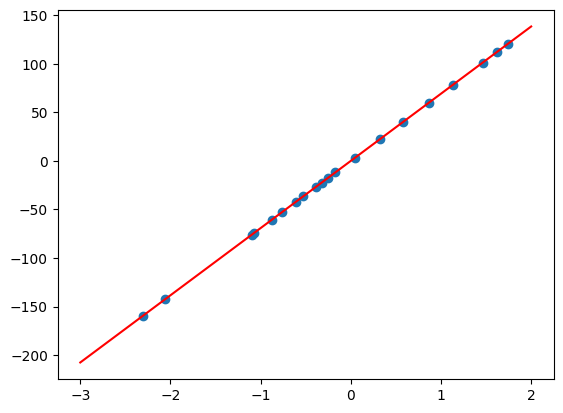

In [ ]:
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

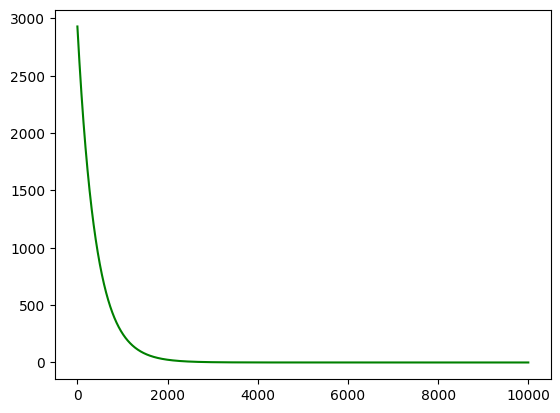

In [ ]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

## **Задания для самостоятельного выполнения**


In [15]:
#1
# Создайте модель линейной регрессии
model = LinearRegression() #LinearRegression(fit_intercept=False) - Это отключит использование свободного члена

model.fit(x, y)

coefficients = model.coef_
intercept = model.intercept_


print("Значения параметров (коэффициенты):", coefficients)
print("Значение свободного члена (intercept):", intercept)

Значения параметров (коэффициенты): [[ 1.00000000e+00  1.18456795e-17]
 [-1.07020805e-15  6.91877114e+01]]
Значение свободного члена (intercept): [1.77635684e-15 7.10542736e-15]


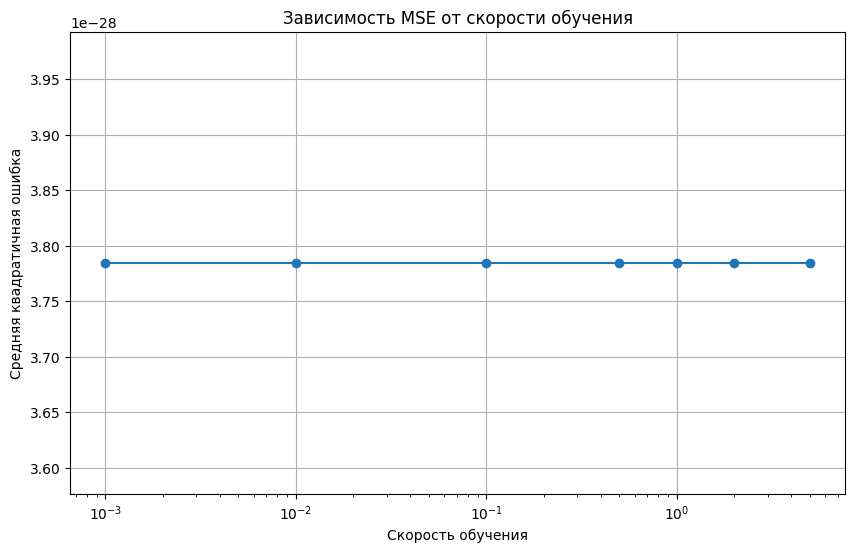

In [34]:
#2
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv')
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv')

x = x.values
y = y.values

# Создание массива скоростей обучения для проверки
learning_rates = [0.001, 0.01, 0.1, 0.5, 1, 2, 5]

# Словарь для хранения результатов
results = {}

# Обучение модели с разными скоростями обучения
for learning_rate in learning_rates:
    # Создание модели
    model = LinearRegression()

    # Обучение модели
    model.fit(x, y)

    # Получение предсказаний
    y_pred = model.predict(x)

    # Вычисление средней квадратичной ошибки
    mse = mean_squared_error(y, y_pred)

    # Сохранение результата
    results[learning_rate] = mse

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, [results[lr] for lr in learning_rates], marker='o')
plt.title('Зависимость MSE от скорости обучения')
plt.xlabel('Скорость обучения')
plt.ylabel('Средняя квадратичная ошибка')
plt.xscale('log')
plt.grid(True)
plt.show()


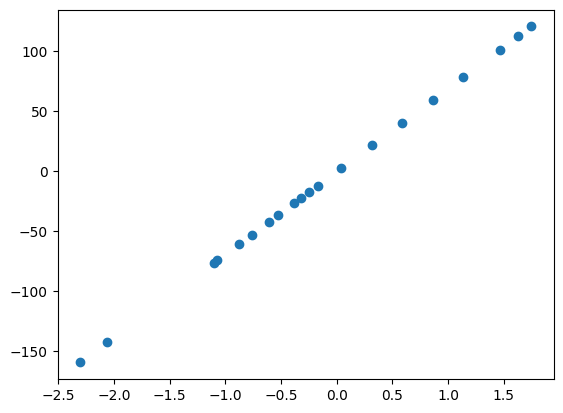

Начальные параметры: (0, 0)
Ошибка после градиентного спуска: 0.03937321303112907


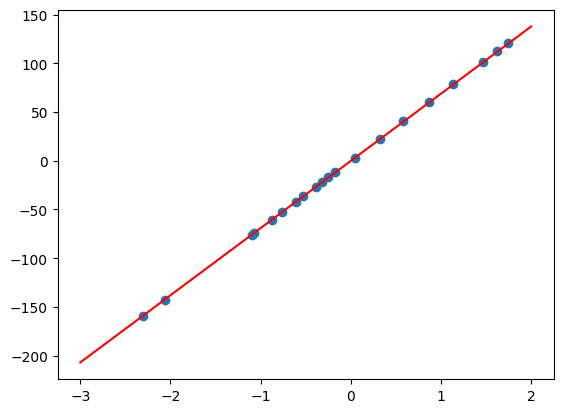

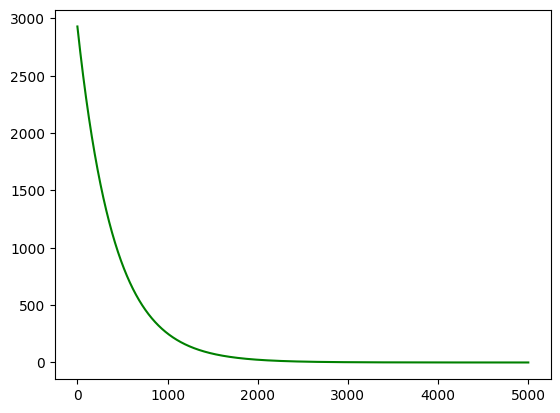

Начальные параметры: (1, 1)
Ошибка после градиентного спуска: 0.03632269468793788


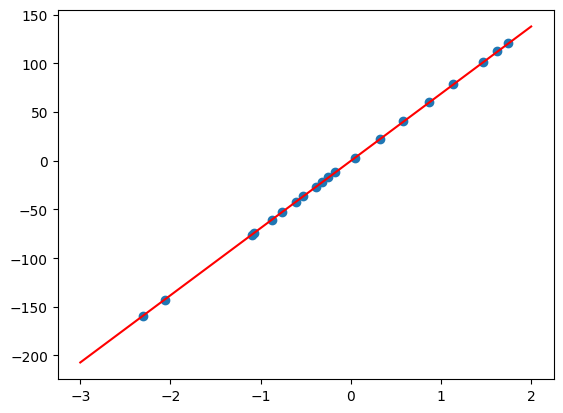

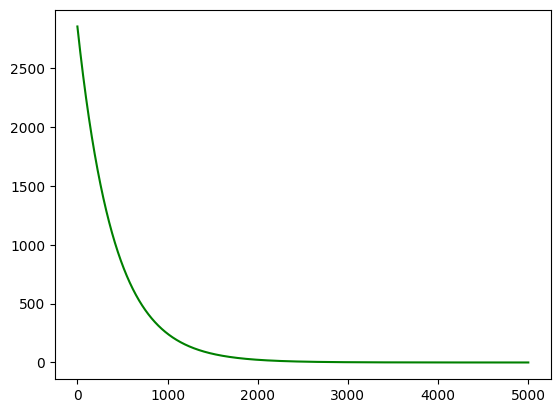

Начальные параметры: (-1, 1)
Ошибка после градиентного спуска: 0.04022915280753152


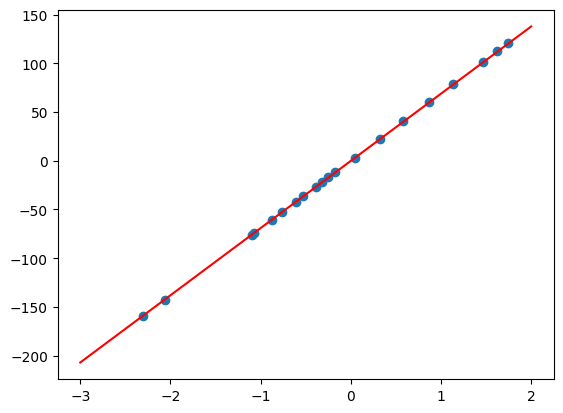

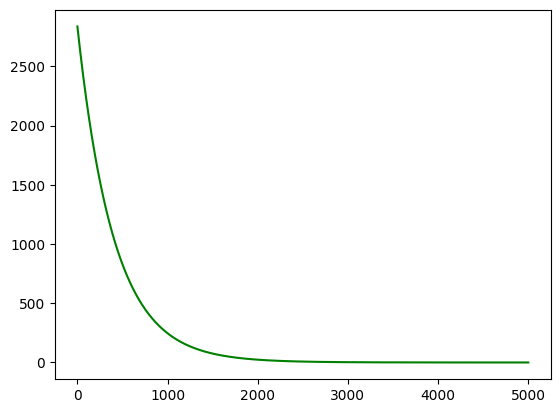

Начальные параметры: (1, -1)
Ошибка после градиентного спуска: 0.03854171741814608


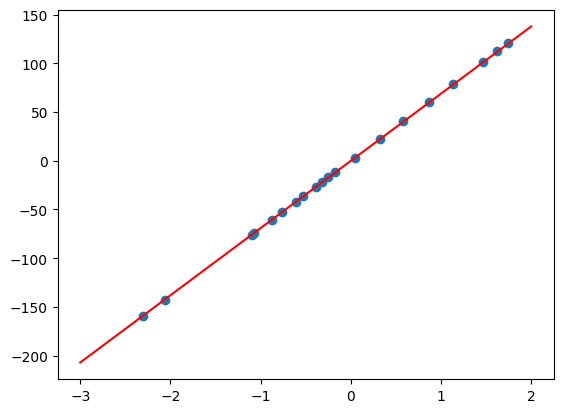

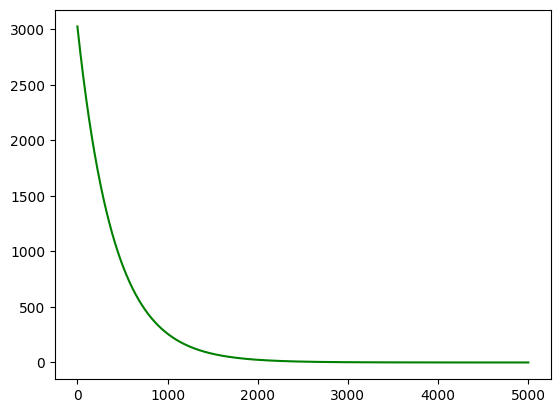

In [35]:
#3
data = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)

# Проверка на DataFrame и Series
if isinstance(data, pd.Series):
    x = data
elif isinstance(data, pd.DataFrame) and len(data.columns) == 1:
    x = data.iloc[:, 0]
else:
    raise ValueError("Данные должны представлять собой Series или Dataframe с одним столбцом")

y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

plt.figure()
plt.scatter(x, y)  # Создаём точечную диаграмму
plt.show()

class Model(object):
    """Модель парной линейной регрессии"""

    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, accuracy=0.01, max_steps=5000):
        steps, errors = [], []
        step = 0
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
        return steps, errors

# Выполните обучение с разными начальными значениями
initial_params = [(0, 0), (1, 1), (-1, 1), (1, -1)]
for b0, b1 in initial_params:
    hyp = Model(b0, b1)
    steps, errors = hyp.fit(x, y)
    J = hyp.error(x, y)
    print("Начальные параметры:", (b0, b1))
    print("Ошибка после градиентного спуска:", J)

    X0 = np.linspace(-3, 2, 100)
    Y0 = hyp.predict(X0)
    plt.figure()
    plt.scatter(x, y)
    plt.plot(X0, Y0, 'r')
    plt.show()

    plt.figure()
    plt.plot(steps, errors, 'g')
    plt.show()

In [ ]:
#4
# Загрузка данных
data = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)

# Проверка на DataFrame и Series
if isinstance(data, pd.Series):
    x = data
elif isinstance(data, pd.DataFrame) and len(data.columns) == 1:
    x = data.iloc[:, 0]
else:
    raise ValueError("Данные должны представлять собой Series или Dataframe с одним столбцом")

y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

plt.figure()
plt.scatter(x, y)  # Создаём точечную диаграмму
plt.show()

class Model(object):
    """Модель парной линейной регрессии"""

    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, alpha=0.001, min_error_change=0.000001, max_steps=5000):
        steps, errors = [], []
        step = 0
        prev_error = self.error(X, Y)
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if prev_error - new_err < min_error_change:
                break
            prev_error = new_err
        return steps, errors

# Выполните обучение с разными начальными значениями
initial_params = [(0, 0), (1, 1), (-1, 1), (1, -1)]
for b0, b1 in initial_params:
    hyp = Model(b0, b1)
    steps, errors = hyp.fit(x, y)
    J = hyp.error(x, y)
    print("Начальные параметры:", (b0, b1))
    print("Ошибка после градиентного спуска:", J)

    X0 = np.linspace(-3, 2, 100)
    Y0 = hyp.predict(X0)
    plt.figure()
    plt.scatter(x, y)
    plt.plot(X0, Y0, 'r')
    plt.show()

    plt.figure()
    plt.plot(steps, errors, 'g')
    plt.show()

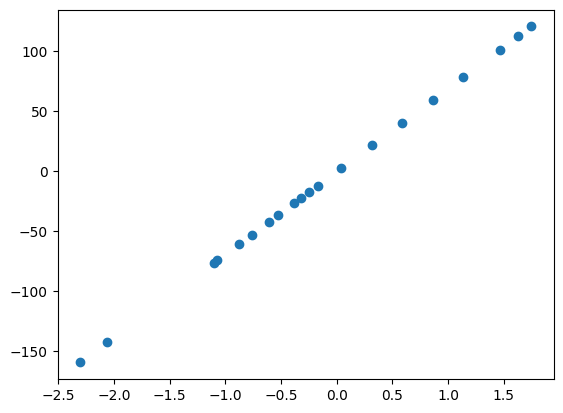

Начальные параметры: (0, 0)
Ошибка после градиентного спуска: 4.1772608368551725e-08


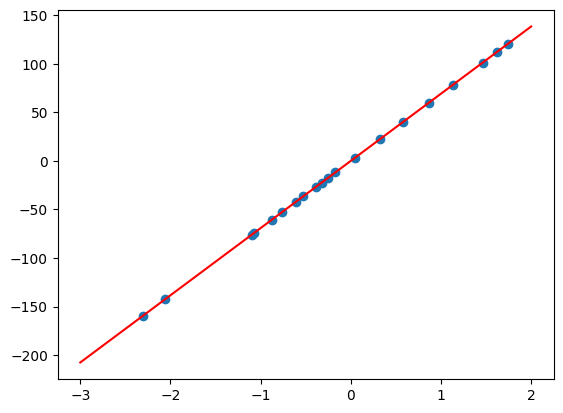

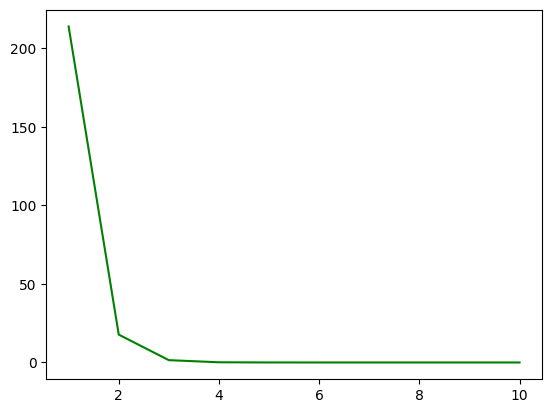

In [38]:
#6
# Загрузка данных
data = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)

# Проверка на DataFrame и Series
if isinstance(data, pd.Series):
    x = data
elif isinstance(data, pd.DataFrame) and len(data.columns) == 1:
    x = data.iloc[:, 0]
else:
    raise ValueError("Данные должны представлять собой Series или Dataframe с одним столбцом")

y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

plt.figure()
plt.scatter(x, y)  # Создаём точечную диаграмму
plt.show()

class Model(object):
    """Модель парной линейной регрессии"""

    def __init__(self, b0=0, b1=0):
        self.b0 = b0
        self.b1 = b1

    def predict(self, X):
        return self.b0 + self.b1 * X

    def error(self, X, Y):
        return sum(((self.predict(X) - Y) ** 2) / (2 * len(X)))

    def fit(self, X, Y, alpha=1.0, min_error_change=0.000001, max_steps=5000):
        steps, errors = [], []
        step = 0
        prev_error = self.error(X, Y)
        for _ in range(max_steps):
            dJ0 = sum(self.predict(X) - Y) / len(X)
            dJ1 = sum((self.predict(X) - Y) * X) / len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = self.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if prev_error - new_err < min_error_change:
                break
            prev_error = new_err

            # Проверка на увеличение ошибки
            if new_err > prev_error:
                alpha /= 2  # Уменьшаем скорость обучения вдвое
                prev_error = new_err  # Возвращаем предыдущее значение ошибки
                # Перезапускаем градиентный спуск
                step = 0
                self.b0 = 0
                self.b1 = 0

        return steps, errors

# Выполните обучение с разными начальными значениями
initial_params = (0, 0)
hyp = Model(*initial_params)
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
print("Начальные параметры:", initial_params)
print("Ошибка после градиентного спуска:", J)

X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

plt.figure()
plt.plot(steps, errors, 'g')
plt.show()